## ERI imagery from AWS! 
Learn to read & visualize Emergency Response Imagery (ERI) from AWS, using both the parquet file to visualize all instances of previous surveys, and individual tiff files from historical events. 

### 1. Import required packages and request ERI parquet data from AWS.

In [ ]:
import geopandas as gpd
import ipywidgets as widgets
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy import feature as cf
import rasterio
from rasterio.plot import show
from rasterio.merge import merge
from pathlib import Path

!wget https://noaa-eri-pds.s3.amazonaws.com/noaa_eri_pds.parquet

### 2. Search the parquet file for events within a bounding box.

In [2]:
df = gpd.read_parquet("noaa_eri_pds.parquet")

### Edit bounding box constraints here!! ###
min_lat = 30
max_lat = 30.25
min_lon = -86
max_lon = -85.5

subset1 = df.cx[min_lon:max_lon,min_lat:max_lat]

### 3. Plot all historical ERI survey locations for your selected region.

Contributing events:
     2020_Hurricane_Sally
     2018_Tropical_Storm_Gordon
     2018_Hurricane_Michael


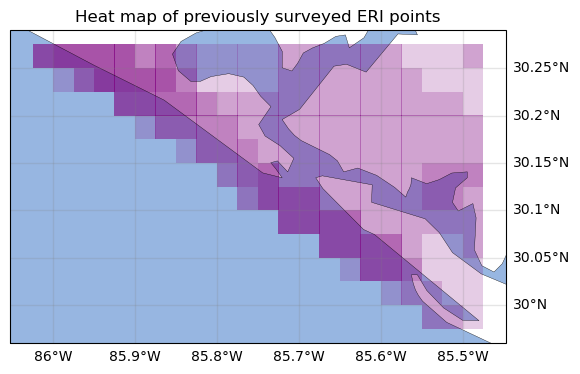

In [3]:
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree()) 
ax.add_feature(cf.OCEAN)
ax.add_feature(ccrs.cartopy.feature.STATES, linewidth=0.25)

events = [] 

print("Contributing events:")
for f in subset1.collection.unique():
    if str(f)[-5:] != "Event":
        event = subset1[subset1.collection == f]
        events.append(str(f))
        print(f"     {str(f)}")
        event.plot(ax=ax, color = "purple", alpha=.2);  
    
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.2, linestyle='-')
gl.top_labels = False
gl.left_labels = False

plt.title("Heat map of previously surveyed ERI points");

### 4. Select one of the region's historical events for further exploration.

In [4]:
selection = widgets.Dropdown(options=[s for s in events], description='Event:')
selection

Dropdown(description='Event:', options=('2020_Hurricane_Sally', '2018_Tropical_Storm_Gordon', '2018_Hurricane_…

### 5. Select a date.

In [26]:
selected_files = subset1[subset1.collection == selection.value]
date = selected_files.datetime.unique()
date_select = widgets.Dropdown(options=[d for d in date], description='Date:')
date_select

Dropdown(description='Date:', options=(Timestamp('2020-09-20 12:00:00+0000', tz='UTC'), Timestamp('2020-09-21 …

### 6. Select a set of precise coordinates from the range of data.

In [29]:
selected_files = subset1[(subset1.collection == selection.value) & (subset1.datetime == date_select.value)]
print(f"Range for your selection: ")
print(f"     Longitude: {selected_files.geometry.bounds.minx.min()} to {selected_files.geometry.bounds.maxx.max()}")
print(f"     Latitude: {selected_files.geometry.bounds.miny.min()} to {selected_files.geometry.bounds.maxy.max()}")

Range for your selection: 
     Longitude: -86.0251 to -85.5749
     Latitude: 30.0249 to 30.2751


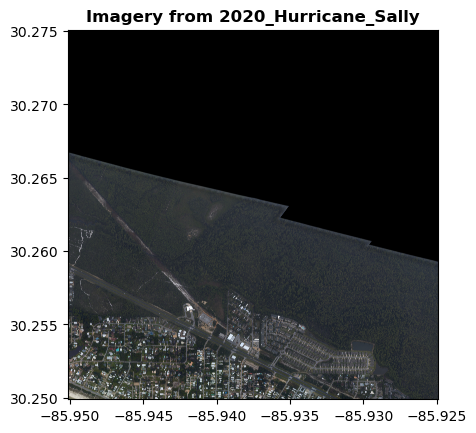

In [30]:
### Input your coordinates here to see the ERI file for your location!! ###
lon = -85.932
lat = 30.253

geom_selected_files = selected_files[(selected_files.geometry.bounds.minx <= lon) & (lon <= selected_files.geometry.bounds.maxx) & (selected_files.geometry.bounds.miny <= lat) & (lat <= selected_files.geometry.bounds.maxy)]

img = rasterio.open(geom_selected_files.location.values[0])
show(img, title=(f'Imagery from {selection.value}'));

### 7. Credits!     
This code was written using original script from Jon Sellars and Jason Woolard from NOAA's National Geodetic Survey. Thank you for your contributions!!

This notebook was created for NOAA Open Data Dissemination ([NODD](https://www.noaa.gov/information-technology/open-data-dissemination))'s ERI Office Hours, to provide an example of the numerous uses of ERI imagery in Python. Questions about the code itself can be directed to Mya Sears (mjsears@ncsu.edu) at the North Carolina Institute for Climate Studies. 